# Interview Questions
## Joey Li

__Install packages__

In [1]:
%matplotlib notebook
import numpy as np
import pandas as pd
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

__Load DataSets__

In [2]:
df_Q1 = pd.read_csv("Adops & Data Scientist Sample Data - Q1 Analytics.csv")
df_Q2 = pd.read_csv("Adops & Data Scientist Sample Data - Q2 Regression.csv", names=["A", "B", "C"])

## Question 1: Analytics
### Consider only the rows with country_id = "BDV" (there are 844 such rows). For each site_id, we can compute the number of unique user_id's found in these 844 rows. Which site_id has the largest number of unique users? And what's the number?

In [3]:
df_Q1.isnull().mean() #Check for null values

ts            0.0
user_id       0.0
country_id    0.0
site_id       0.0
dtype: float64

In [4]:
df_Q1.drop_duplicates(keep=False,inplace=True) 

In [5]:
df_Q1.head()

,ts,user_id,country_id,site_id
0,2019-02-01 00:01:24,LC36FC,TL6,N0OTG
1,2019-02-01 00:10:19,LC39B6,TL6,N0OTG
2,2019-02-01 00:21:50,LC3500,TL6,N0OTG
3,2019-02-01 00:22:50,LC374F,TL6,N0OTG
4,2019-02-01 00:23:44,LCC1C3,TL6,QGO3G


In [6]:
# Find the corresponding 844 rows, and then perform distinct count on user_id group by site_id.
df_Q1.loc[df_Q1['country_id']=='BDV'].groupby('site_id')['user_id'].nunique().sort_values(ascending=False)

site_id
5NPAU    544
N0OTG     90
3POLC      2
Name: user_id, dtype: int64

In [7]:
print('Site "5NPAU" has the largest number of unique users, and the number is 544.')

Site "5NPAU" has the largest number of unique users, and the number is 544.


### Between 2019-02-03 00:00:00 and 2019-02-04 23:59:59, there are four users who visited a certain site more than 10 times. Find these four users & which sites they (each) visited more than 10 times. (Simply provides four triples in the form (user_id, site_id, number of visits) in the box below.)

In [8]:
# Select rows between 2019-02-03 00:00:00 and 2019-02-04 23:59:59, and count number of visit for each user for each site they visited
visit_count = pd.DataFrame(df_Q1.loc[(df_Q1['ts'] >= '2019-02-03 00:00:00') & (df_Q1['ts'] <= '2019-02-04 23:59:59')].groupby('user_id')['site_id'].value_counts())

In [9]:
# Select rows with visit counts >= 10
visit_count.columns = ['count']
visit_count.loc[visit_count['count'] >= 10]

,,count
user_id,site_id,
LC06C3,N0OTG,25
LC3A59,N0OTG,26
LC3C7E,3POLC,15
LC3C9D,N0OTG,17


### For each site, compute the unique number of users whose last visit (found in the original data set) was to that site. For instance, user "LC3561"'s last visit is to "N0OTG" based on timestamp data. Based on this measure, what are top three sites? (hint: site "3POLC" is ranked at 5th with 28 users whose last visit in the data set was to 3POLC; simply provide three pairs in the form (site_id, number of users).)

In [10]:
df_last_visit = df_Q1.sort_values('ts').groupby('user_id').tail(1) # Select the rows that is the last visit for each user
df_last_visit['site_id'].value_counts().head(3) # Count the number of users for each site

5NPAU    992
N0OTG    561
QGO3G    289
Name: site_id, dtype: int64

### For each user, determine the first site he/she visited and the last site he/she visited based on the timestamp data. Compute the number of users whose first/last visits are to the same website. What is the number?

In [11]:
df_first_visit = df_Q1.sort_values('ts').groupby('user_id').head(1) # Select the rows that is the first visit for each user

In [12]:
# Select wanted columns and rename them accordingly
df_first_visit = df_first_visit[['ts','user_id','site_id']]
df_first_visit.columns = ['first_ts','user_id', 'first_site_id']

df_last_visit = df_last_visit[['ts','user_id','site_id']]
df_last_visit.columns = ['last_ts','user_id', 'last_site_id']

In [13]:
# Sort rows based on user_id and then column wise bind the dataframes together.
df_first_visit = df_first_visit.sort_values('user_id')
df_last_visit = df_last_visit.sort_values('user_id')
df_visit = pd.concat([df_first_visit.reset_index(drop=True), df_last_visit.reset_index(drop=True)], axis=1)

In [14]:
df_visit.head()

,first_ts,user_id,first_site_id,last_ts,user_id,last_site_id
0,2019-02-03 18:52:50,LC00C3,5NPAU,2019-02-03 18:52:50,LC00C3,5NPAU
1,2019-02-04 11:35:10,LC01C3,5NPAU,2019-02-04 11:35:10,LC01C3,5NPAU
2,2019-02-02 14:14:44,LC05C3,5NPAU,2019-02-02 14:14:44,LC05C3,5NPAU
3,2019-02-01 22:49:39,LC06C3,N0OTG,2019-02-07 01:16:12,LC06C3,N0OTG
4,2019-02-05 19:06:42,LC07C3,5NPAU,2019-02-05 19:06:42,LC07C3,5NPAU


In [15]:
df_visit.loc[df_visit['first_site_id'] == df_visit['last_site_id']].shape

(1670, 6)

In [16]:
print('If assume user who has only one record is also considered to be a user whose first/last visits are to the same website, then the number is 1670.')

If assume user who has only one record is also considered to be a user whose first/last visits are to the same website, then the number is 1670.


In [17]:
df_visit.loc[(df_visit['first_site_id'] == df_visit['last_site_id']) & (df_visit['first_ts'] != df_visit['last_ts'])].shape

(409, 6)

In [18]:
print('If assume user who has only one record should be exclude from the users whose first/last visits are to the same website, then the number should be 409.')

If assume user who has only one record should be exclude from the users whose first/last visits are to the same website, then the number should be 409.


## Question 2
### The data contains 300 rows and 3 columns (from the left, A, B, and C). Please build a good regression model which explains column C by a function of  A and B. 

#### EDA on dataframe

In [19]:
df_Q2.isnull().mean()

A    0.0
B    0.0
C    0.0
dtype: float64

In [20]:
df_Q2.describe()

,A,B,C
count,300.000000,300.000000,300.000000
mean,2.317009,2.013115,-41.564919
std,5.695248,2.998680,581.251021
min,-8.860000,-2.890000,-10000.000000
25%,-1.940000,-0.606250,-23.375000
50%,0.468500,1.935000,-3.090000
75%,7.042500,4.697500,16.300000
max,20.600000,7.000000,202.000000


<IPython.core.display.Javascript object>


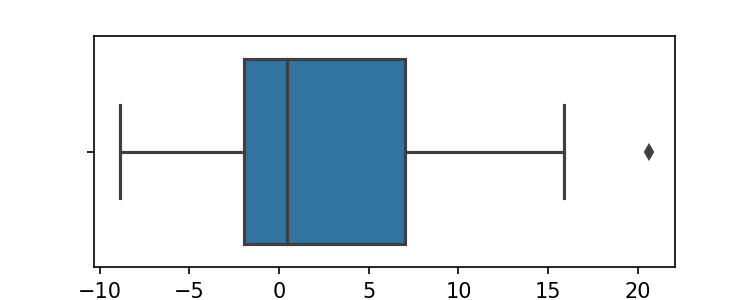

In [21]:
fig = plt.figure(figsize = (5,2))
sns.boxplot(x=df_Q2['A'])

<IPython.core.display.Javascript object>


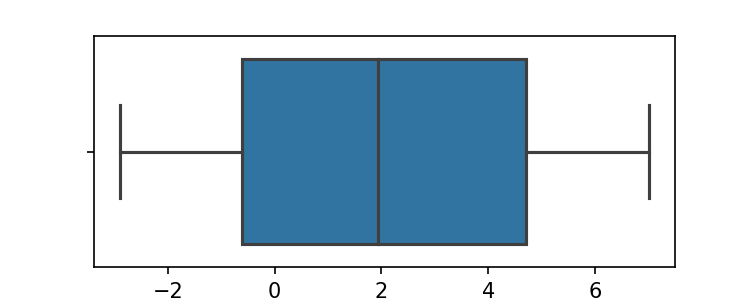

In [22]:
fig = plt.figure(figsize = (5,2))
sns.boxplot(x=df_Q2['B'])

<IPython.core.display.Javascript object>


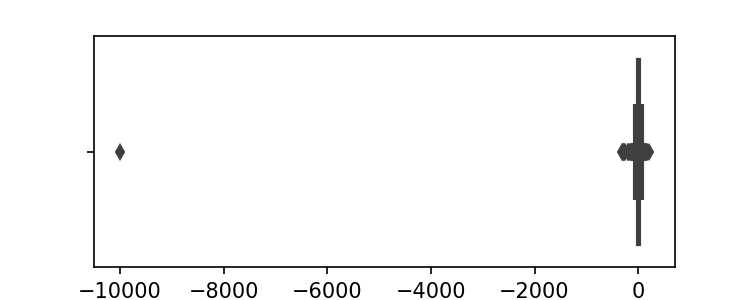

In [23]:
fig = plt.figure(figsize = (5,2))
sns.boxplot(x=df_Q2['C'])

In [24]:
# From above we see outlier for A and C, so we remove outliers
def calculate_zscore(col):
    zscore_col = (df_Q2[col] - df_Q2[col].mean()) / (df_Q2[col].std())
    return zscore_col

df_Q2['zscore_A'] = abs(calculate_zscore('A'))
df_Q2['zscore_C'] = abs(calculate_zscore('C'))

df_Q2 = df_Q2[df_Q2['zscore_A'] < 3]
df_Q2 = df_Q2[df_Q2['zscore_C'] < 3]

In [25]:
# Also the scale of variables are not the same, so we do normalization
df_Q2 = df_Q2[['A','B','C']]
df_Q2_clean = (df_Q2 - df_Q2.mean())/df_Q2.std()

In [26]:
df_Q2_clean.describe()

,A,B,C
count,2.980000e+02,2.980000e+02,2.980000e+02
mean,1.162381e-16,-6.933306e-16,9.686510e-18
std,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.981629e+00,-1.640232e+00,-4.389134e+00
25%,-7.486435e-01,-8.741929e-01,-2.186448e-01
50%,-3.208513e-01,-2.277886e-02,6.714192e-02
75%,8.502167e-01,8.951676e-01,3.390140e-01
max,2.442823e+00,1.658039e+00,2.989231e+00


#### There is no prediction required from the question, so here we achieve the best fit and not split training and test set.

In [27]:
# Set dependent and independent variables
X = df_Q2_clean.iloc[:, 0:2]
Y = np.array(df_Q2_clean.iloc[:, 2:3])

<IPython.core.display.Javascript object>


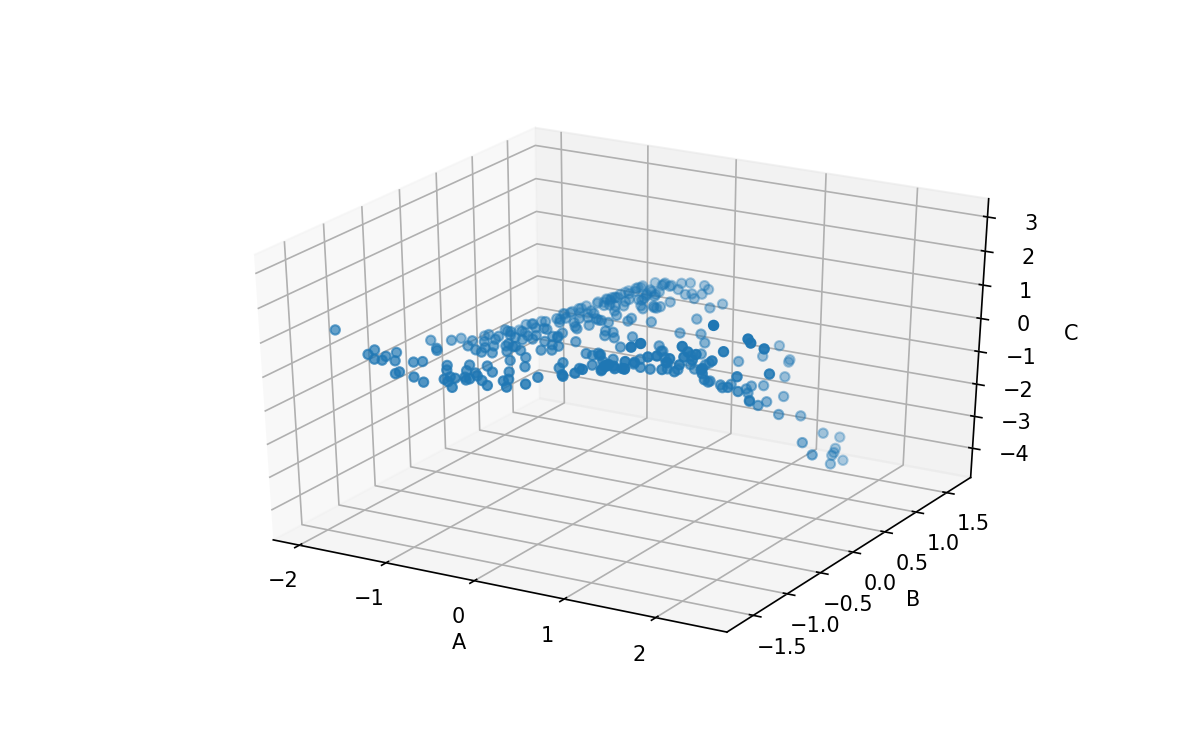

Text(0.5, 0, 'C')

In [28]:
# graph the data
fig = plt.figure(figsize = (8,5))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X['A'], X['B'], Y)
ax.set_xlabel('A')
ax.set_ylabel('B')
ax.set_zlabel('C')

In [29]:
# The figure above indicates that this is a polynomial regression
A = X['A']
B = X['B']

features = {}
features['A^0*B^0'] = (A**0) * (B**0)
features['A*B'] = A * B
features['A*B^2'] = A * B**2
features['A^2*B^0'] = A**2 * B**0
features['A^2*B'] = A**2 * B
features['A^0*B^3'] = A**0 * B**3
X = pd.DataFrame(features)

In [30]:
X = np.array(X.iloc[:,0:6])

In [31]:
# Use liner algebra to solve the minimization problem and get the coefficients
a = np.linalg.solve(np.dot(X.T, X),np.dot(X.T, Y))
predictedY = np.dot(X, a)

<IPython.core.display.Javascript object>


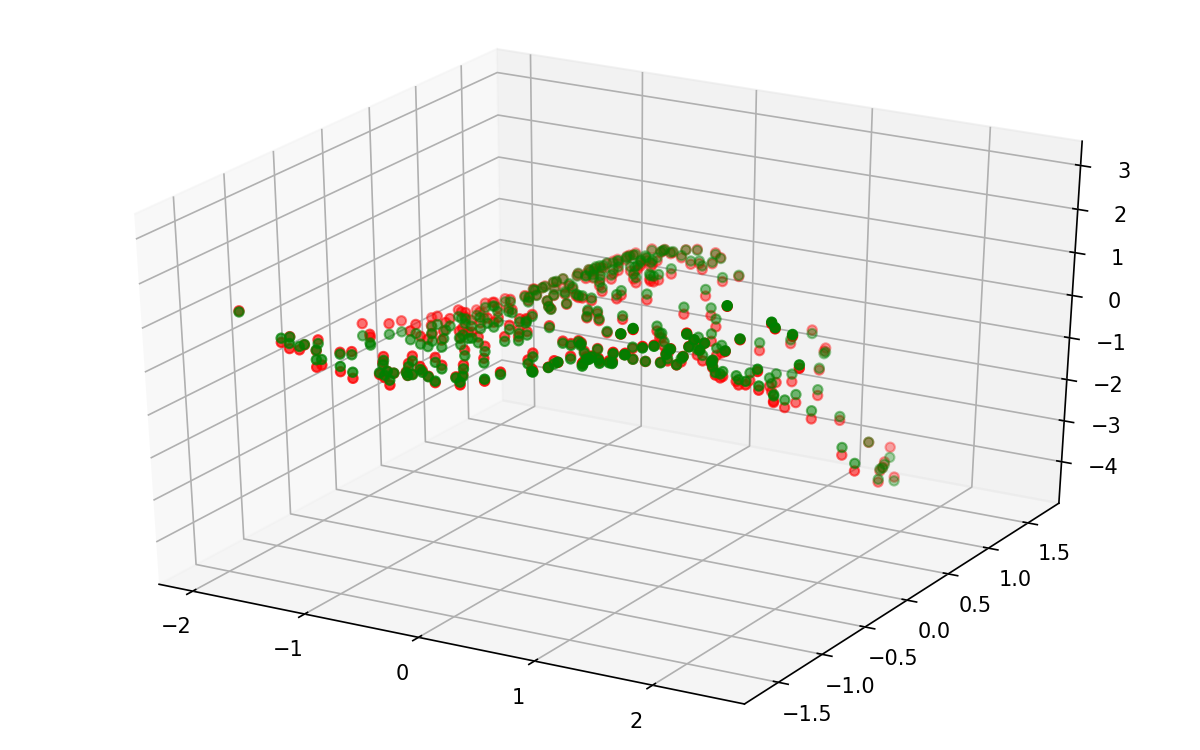

In [33]:
# visualize the results
fig = plt.figure(figsize = (8,5))
ax = Axes3D(fig)
# plot the fitted curve
ax.scatter(A, B, predictedY, color='g', label='Predicted C')
# plot the target values
ax.scatter(A, B, Y, color='r', label='Actual C')
plt.show()

In [34]:
# calculate the r-squared
SSR = (Y - predictedY).flatten()
SST = (Y - Y.mean()).flatten()
rSquared = 1 - (SSR.dot(SSR) / SST.dot(SST))
print("the r-squared is: ", rSquared)
print("the intercept is: ", a[0][0])
print("the coefficients are: ", a[1:6])

the r-squared is:  0.9902162267104097
the intercept is:  0.1912607143476499
the coefficients are:  [[-0.41940276]
 [-0.06857694]
 [-0.38956342]
 [-0.56569306]
 [-0.09247048]]
